In [1]:
# v2 version with plumb bob v1 and v2

In [49]:
%matplotlib widget

import open3d as o3d
import numpy as np
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
import os
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import functions as fun
import geoms
from scipy.spatial import distance
import importlib 
importlib.reload(fun)
importlib.reload(geoms)

<module 'geoms' from '/Users/ehealy/Chicago/Simons_II/photopol/geoms.py'>

# initial processing

Use open3d to import and view zephyr photogrammetry exports

### data files
Code requires dense point cloud, textured mesh

In [2]:
ply_file = "data/plumbbobv2_maya/point_cloud/Dense_point_cloud 1.ply" # maya's feb 2025 photos
obj_file = "data/plumbbobv2_maya/textured_mesh/Textured_mesh_1.obj"
mtl_file = "data/plumbbobv2_maya/textured_mesh/Textured_mesh_1.mtl"  # Ensure the .mtl file is correctly referenced
jpeg_file = "data/plumbbobv2_maya/textured_mesh/Textured_mesh_1_tex0.jpg"  # The first texture file, but Open3D will handle multiple


In [3]:
ply_file_e = "data/plumbbobv1_erin/point_cloud/Dense point cloud 1.ply" # maya's feb 2025 photos
obj_file_e = "data/plumbbobv1_erin/textured_mesh/Textured_mesh_1.obj"
mtl_file_e = "data/plumbbobv1_erin/textured_mesh/Textured_mesh_1.mtl"  # Ensure the .mtl file is correctly referenced
jpeg_file_e = "data/plumbbobv1_erin/textured_mesh/Textured_mesh_1_tex0.jpg"  # The first texture file, but Open3D will handle multiple


### view point cloud

Viewer will open in separate window

In [4]:
pcd = o3d.io.read_point_cloud(ply_file)

print(f"Loaded {len(pcd.points)} points from the PLY file")

# Visualize the point cloud
o3d.visualization.draw_geometries([pcd], window_name="PLY Viewer")

# Convert to numpy array for further processing
points = np.asarray(pcd.points)
#print("First 5 points:\n", points[:5])


Loaded 891486 points from the PLY file


In [5]:
pcd_e = o3d.io.read_point_cloud(ply_file_e)

print(f"Loaded {len(pcd_e.points)} points from the PLY file")

# Visualize the point cloud
o3d.visualization.draw_geometries([pcd_e], window_name="PLY Viewer")

# Convert to numpy array for further processing
points_e = np.asarray(pcd_e.points)
#print("First 5 points:\n", points[:5])


Loaded 1296676 points from the PLY file


In [6]:
# add bounding cylinder to limit scene
pcd_filtered = fun.filter_points_in_cylinder(pcd, np.array([0, 0, 1]), np.array([0, 0, 0]), 8.0, -1.0, 30.0, "filtered_cylindrical_pointcloud.ply")


Filtered point cloud saved to filtered_cylindrical_pointcloud.ply


In [8]:
# Define cylinder properties
cylinder_center_e = np.array([-6, 0, 13])  # Adjust based on the actual center of your cylinder
cylinder_radius_e = 9.0  # Adjust the radius
cylinder_height_e = 8.0  # Adjust the height

fun.filter_points_in_cylinder(pcd_e, np.array([0, 0, 1]), cylinder_center_e, cylinder_radius_e, 0,18)


PointCloud with 239987 points.

### load and process mesh

In [9]:
# Load the mesh (Open3D will automatically associate the .obj with the .mtl and .jpeg files)
mesh = o3d.io.read_triangle_mesh(obj_file)

# Check if the mesh has textures
if mesh.has_textures():
    print("Mesh has textures!")
else:
    print("Mesh does not have textures.")

# Visualize the textured mesh
o3d.visualization.draw_geometries([mesh], window_name="Textured Mesh")

# Remove degenerate triangles
mesh = fun.remove_degenerate_triangles(mesh)

# Simplify the mesh
# Remove duplicate vertices based on a distance threshold
mesh = mesh.merge_close_vertices(eps=0.01)  # Adjust threshold as needed

# output_file = 'meshes/mesh_v1.obj'  # Specify the path where you want to save the mesh
# o3d.io.write_triangle_mesh(output_file, mesh)
# print(f"Filtered mesh saved to {output_file}")

Mesh does not have textures.


In [10]:
# Load the mesh (Open3D will automatically associate the .obj with the .mtl and .jpeg files)
mesh_e = o3d.io.read_triangle_mesh(obj_file_e)

# Check if the mesh has textures
if mesh_e.has_textures():
    print("Mesh has textures!")
else:
    print("Mesh does not have textures.")

# Visualize the textured mesh
o3d.visualization.draw_geometries([mesh_e], window_name="Textured Mesh")

# Remove degenerate triangles
mesh_e = fun.remove_degenerate_triangles(mesh_e)

# Simplify the mesh
# Remove duplicate vertices based on a distance threshold
mesh_e = mesh_e.merge_close_vertices(eps=0.01)  # Adjust threshold as needed

# output_file = 'meshes/mesh_v1.obj'  # Specify the path where you want to save the mesh
# o3d.io.write_triangle_mesh(output_file, mesh)
# print(f"Filtered mesh saved to {output_file}")

Mesh does not have textures.


In [11]:
# view bounding cylinder

# Define cylinder properties
cylinder_center = np.array([0, 0, 0])  # Adjust based on the actual center of your cylinder
cylinder_radius = 8.0  # Adjust the radius
cylinder_height = 40.0  # Adjust the height

# Filter and color the mesh based on the cylinder
filtered_mesh = fun.filter_and_color_points_by_cylinder(mesh, cylinder_center, cylinder_radius, cylinder_height)

# Visualize the mesh with colored points
o3d.visualization.draw_geometries([filtered_mesh])

# output_file = 'meshes/filtered_mesh_v1.obj'  # Specify the path where you want to save the mesh
# o3d.io.write_triangle_mesh(output_file, filtered_mesh)
# print(f"Filtered mesh saved to {output_file}")

In [13]:
# Define cylinder properties (adjust as needed)
cylinder_center = np.array([-2, -4, 8])  # Center of the cylinder (optional)
cylinder_radius = 5  # Radius from the axis (in whatever units)
cylinder_height = 10.2   # Height of the cylinder along the z-axis

pcd_cyl = fun.filter_points_in_cylinder(pcd, np.array([0, 0, 1]), cylinder_center, cylinder_radius, cylinder_height)


In [15]:


pcd_cyl_e = fun.filter_points_in_cylinder(pcd_e, np.array([0, 0, 1]), cylinder_center_e, cylinder_radius_e, cylinder_height_e)


In [16]:
# view bounding cylinder

# Define cylinder properties
cylinder_center_e = np.array([-6, 0, 13])  # Adjust based on the actual center of your cylinder
cylinder_radius_e = 9.0  # Adjust the radius
cylinder_height_e = 8.0  # Adjust the height

# Filter and color the mesh based on the cylinder
filtered_mesh_e = fun.filter_and_color_points_by_cylinder(mesh_e, cylinder_center_e, cylinder_radius_e, cylinder_height_e)
filtered_mesh_e.remove_unreferenced_vertices()

# Visualize the mesh with colored points
o3d.visualization.draw_geometries([filtered_mesh_e])

# output_file = 'meshes/filtered_mesh_v1.obj'  # Specify the path where you want to save the mesh
# o3d.io.write_triangle_mesh(output_file, filtered_mesh)
# print(f"Filtered mesh saved to {output_file}")

# extracting plumbbob geometry

### constrain bounds of mesh to only include plumb bob

In [18]:
# Define cylinder properties (adjust as needed)
cylinder_center = np.array([0, -2, 8])  # Center of the cylinder (optional)
cylinder_radius = 1  # Radius from the axis (in whatever units)
cylinder_height = 10.0   # Height of the cylinder along the z-axis

# Filter the mesh
mesh_cyl = fun.filter_mesh_by_cylinder(mesh, cylinder_radius, cylinder_height, cylinder_center)

# Visualize the result
fun.visualize_filtered_mesh(mesh_cyl)

# output_file = 'meshes/mesh_cyl_v1.obj'  # Specify the path where you want to save the mesh
# o3d.io.write_triangle_mesh(output_file, mesh_cyl)
# print(f"Filtered mesh saved to {output_file}")

In [19]:

# Filter the mesh
mesh_cyl_e = fun.filter_mesh_by_cylinder(mesh_e, cylinder_radius_e, cylinder_height_e, cylinder_center_e)

# Visualize the result
fun.visualize_filtered_mesh(mesh_cyl_e)

# output_file = 'meshes/mesh_cyl_v1.obj'  # Specify the path where you want to save the mesh
# o3d.io.write_triangle_mesh(output_file, mesh_cyl)
# print(f"Filtered mesh saved to {output_file}")

### find axis of plumbbob

In [21]:
# mesh_cyl_file = 'meshes/mesh_cyl_v1.obj'
# mesh_cyl = o3d.io.read_triangle_mesh(mesh_cyl_file)
cylinder_axis, cylinder_center = fun.find_cylinder_axis_and_center(mesh_cyl)

print("Cylinder axis direction:", cylinder_axis)
print("Cylinder center:", cylinder_center)


Cylinder axis direction: [ 4.60132695e-04 -3.49293452e-03 -9.99993794e-01]
Cylinder center: [-0.74441184 -1.65508627  9.11054752]


In [22]:
# mesh_cyl_file = 'meshes/mesh_cyl_v1.obj'
# mesh_cyl = o3d.io.read_triangle_mesh(mesh_cyl_file)
cylinder_axis_pcd, cylinder_center_pcd = fun.find_cylinder_axis_and_center_pcd(pcd_cyl)

print("Cylinder axis direction:", cylinder_axis_pcd)
print("Cylinder center:", cylinder_center_pcd)


Cylinder axis direction: [ 7.70243156e-04 -2.13837326e-03 -9.99997417e-01]
Cylinder center: [-0.7441862  -1.65392865  9.15884828]


In [23]:
# mesh_cyl_file = 'meshes/mesh_cyl_v1.obj'
# mesh_cyl = o3d.io.read_triangle_mesh(mesh_cyl_file)
cylinder_axis_pcd_e, cylinder_center_pcd_e = fun.find_cylinder_axis_and_center_pcd(pcd_cyl_e)

print("Cylinder axis direction:", cylinder_axis_pcd_e)
print("Cylinder center:", cylinder_center_pcd_e)


Cylinder axis direction: [ 0.00820957  0.00177146 -0.99996473]
Cylinder center: [-4.40498346  2.50811467 13.21803414]


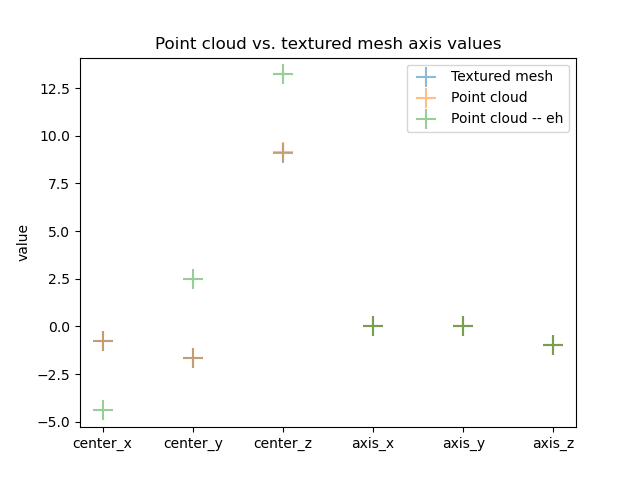

In [24]:
plt.figure()

x = ['center_x','center_y','center_z','axis_x','axis_y','axis_z']
y = np.concatenate((cylinder_center,cylinder_axis))
y_2 = np.concatenate((cylinder_center_pcd,cylinder_axis_pcd))
y_3 = np.concatenate((cylinder_center_pcd_e,cylinder_axis_pcd_e))
plt.scatter(x,y, alpha=0.5, marker='+', s=200, label='Textured mesh')
plt.scatter(x,y_2, alpha=0.5, marker='+', s=200, label='Point cloud')
plt.scatter(x,y_3, alpha=0.5, marker='+', s=200, label='Point cloud -- eh')
plt.legend()
plt.ylabel('value')
plt.title('Point cloud vs. textured mesh axis values')
plt.show()

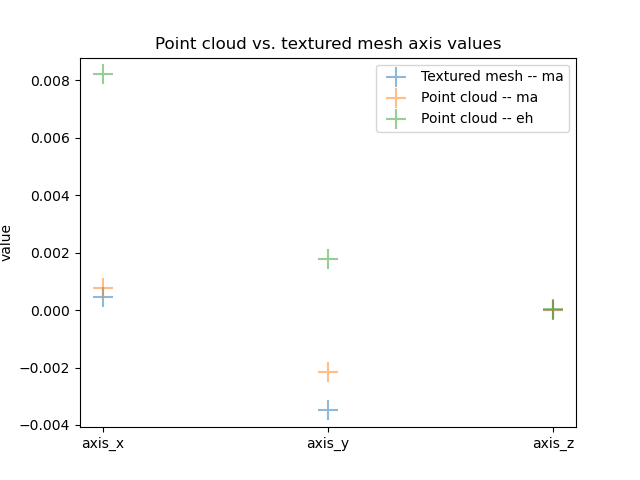

In [27]:
plt.figure()

w = ['axis_x','axis_y','axis_z']
z = cylinder_axis
z_hat = [0,0,1] # for subtracting z vector
z_2 = cylinder_axis_pcd
z_3 = cylinder_axis_pcd_e
plt.scatter(w,z+z_hat, alpha=0.5, marker='+', s=200, label='Textured mesh -- ma')
plt.scatter(w,z_2+z_hat, alpha=0.5, marker='+', s=200, label='Point cloud -- ma')
plt.scatter(w,z_3+z_hat, alpha=0.5, marker='+', s=200, label='Point cloud -- eh')
plt.legend()
plt.ylabel('value')
plt.title('Point cloud vs. textured mesh axis values')
plt.show()

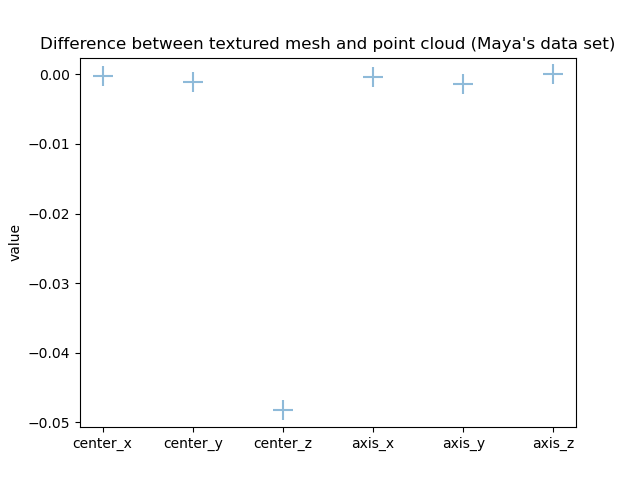

In [31]:
plt.figure()
plt.scatter(x,(y-y_2), alpha=0.5, marker='+', s=200, label='Delta')
# plt.scatter(x,y_2, alpha=0.5, marker='+', s=200, label='Point cloud')
plt.ylabel('value')
plt.title('Difference between textured mesh and point cloud (Maya\'s data set)')
plt.show()

In [35]:


dot_product = np.dot(cylinder_axis, cylinder_axis_pcd)
norm_cylinder_axis = np.linalg.norm(cylinder_axis)
norm_cylinder_axis_pcd = np.linalg.norm(cylinder_axis_pcd)

# Compute the cosine of the angle
cos_theta = dot_product / (norm_cylinder_axis * norm_cylinder_axis_pcd)

# Compute the angle in radians
angle_rad = np.arccos(np.clip(cos_theta, -1.0, 1.0))  # Clip to handle numerical errors

# Convert the angle to degrees
angle_deg = np.degrees(angle_rad)
print(f'Angle between point cloud and textured mesh hex rod data sets: {angle_deg} deg')
print(f'Dot product: {dot_product}')


Angle between point cloud and textured mesh hex rod data sets: 0.07961883319513739 deg
Dot product: 0.999999034491087


In [37]:


dot_product = np.dot(cylinder_axis_pcd, cylinder_axis_pcd_e)
norm_cylinder_axis = np.linalg.norm(cylinder_axis_pcd)
norm_cylinder_axis_pcd = np.linalg.norm(cylinder_axis_pcd_e)

# Compute the cosine of the angle
cos_theta = dot_product / (norm_cylinder_axis * norm_cylinder_axis_pcd)

# Compute the angle in radians
angle_rad = np.arccos(np.clip(cos_theta, -1.0, 1.0))  # Clip to handle numerical errors

# Convert the angle to degrees
angle_deg = np.degrees(angle_rad)
print(f'Angle between cylinder and hex rod data sets: {angle_deg} deg')
print(f'Dot product: {dot_product}')


Angle between cylinder and hex rod data sets: 0.4815294736959893 deg
Dot product: 0.9999646842907356


# Photogrammetry errors

In [46]:
cylinder_axis, cylinder_center, cylinder_radius = fun.find_cylinder_axis_center_radius(mesh_cyl)
print("Cylinder axis:", cylinder_axis)
print("Cylinder center:", cylinder_center)
print("Cylinder radius:", cylinder_radius)

Cylinder axis: [ 4.60132695e-04 -3.49293452e-03 -9.99993794e-01]
Cylinder center: [-0.74441184 -1.65508627  9.11054752]
Cylinder radius: 0.10572392895586995


In [47]:
cylinder_axis_pcd, cylinder_center_pcd, cylinder_radius_pcd = fun.find_cylinder_axis_center_radius(pcd_cyl)
print("Cylinder axis:", cylinder_axis_pcd)
print("Cylinder center:", cylinder_center_pcd)
print("Cylinder radius:", cylinder_radius_pcd)

Cylinder axis: [ 7.70243156e-04 -2.13837326e-03 -9.99997417e-01]
Cylinder center: [-0.7441862  -1.65392865  9.15884828]
Cylinder radius: 0.10277935815565378


In [48]:
cylinder_axis_pcd_e, cylinder_center_pcd_e, cylinder_radius_pcd_e = fun.find_cylinder_axis_center_radius(pcd_cyl_e)
print("Cylinder axis:", cylinder_axis_pcd_e)
print("Cylinder center:", cylinder_center_pcd_e)
print("Cylinder radius:", cylinder_radius_pcd_e)

Cylinder axis: [ 0.00820957  0.00177146 -0.99996473]
Cylinder center: [-4.40498346  2.50811467 13.21803414]
Cylinder radius: 0.03957530413641009


In [50]:
variance = fun.compute_cylinder_variance(mesh_cyl, cylinder_axis, cylinder_center, cylinder_radius)
print(f"Variance in distance from ideal cylinder: {variance}")


Variance in distance from ideal cylinder: 0.5186573089118445


In [51]:
variance = fun.compute_cylinder_variance(pcd_cyl, cylinder_axis_pcd, cylinder_center_pcd, cylinder_radius_pcd)
print(f"Variance in distance from ideal cylinder: {variance}")


Variance in distance from ideal cylinder: 8.91100663158424e-08


In [52]:
variance = fun.compute_cylinder_variance(pcd_cyl_e, cylinder_axis_pcd_e, cylinder_center_pcd_e, cylinder_radius_pcd_e)
print(f"Variance in distance from ideal cylinder: {variance}")


Variance in distance from ideal cylinder: 1.619600288085942e-07


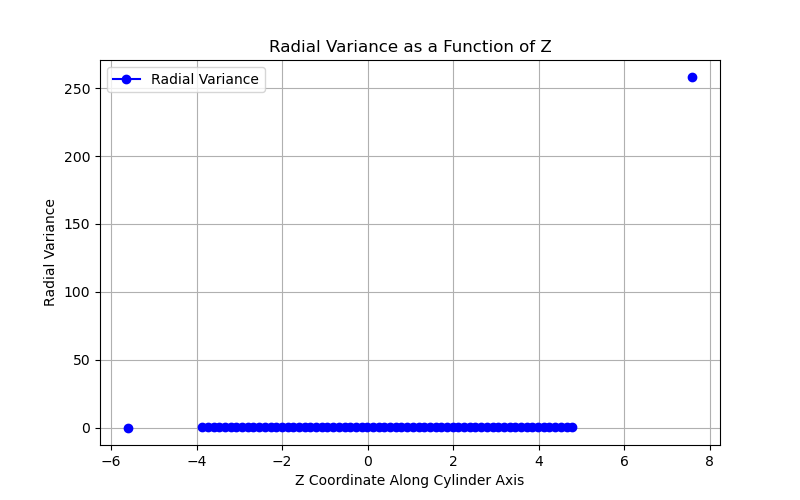

In [53]:
bin_centers, binned_variances = fun.compute_and_plot_binned_cylinder_variance(mesh_cyl, cylinder_axis, 
                                                                                cylinder_center, cylinder_radius,
                                                                               num_bins=100)



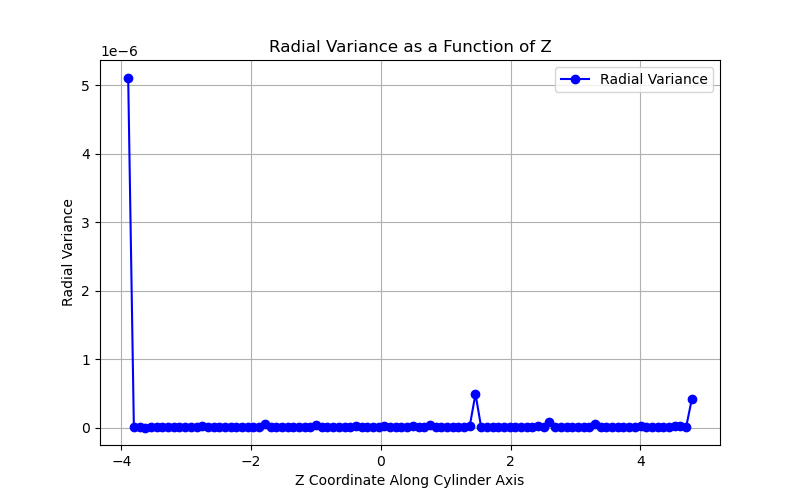

In [54]:
# Example usage:
bin_centers, binned_variances = fun.compute_and_plot_binned_cylinder_variance(pcd_cyl, cylinder_axis_pcd, 
                                                                                cylinder_center_pcd, cylinder_radius_pcd,
                                                                               num_bins=100)



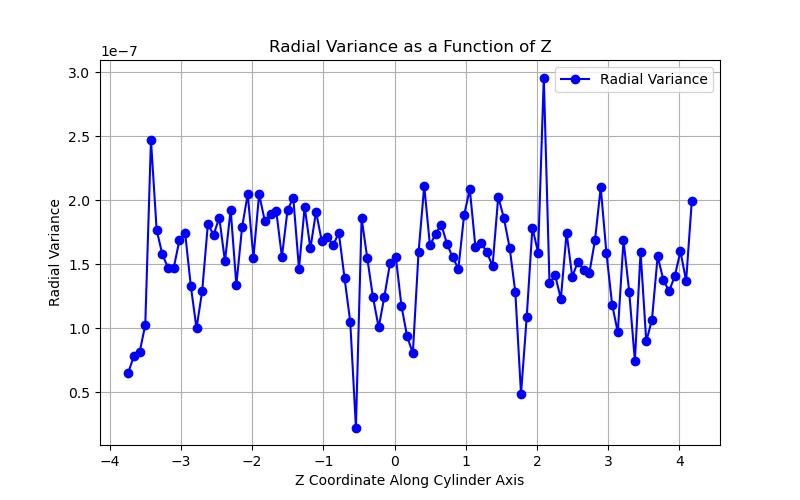

In [55]:
# Example usage:
bin_centers, binned_variances = fun.compute_and_plot_binned_cylinder_variance(pcd_cyl_e, cylinder_axis_pcd_e, 
                                                                                cylinder_center_pcd_e, cylinder_radius_pcd_e,
                                                                               num_bins=100)



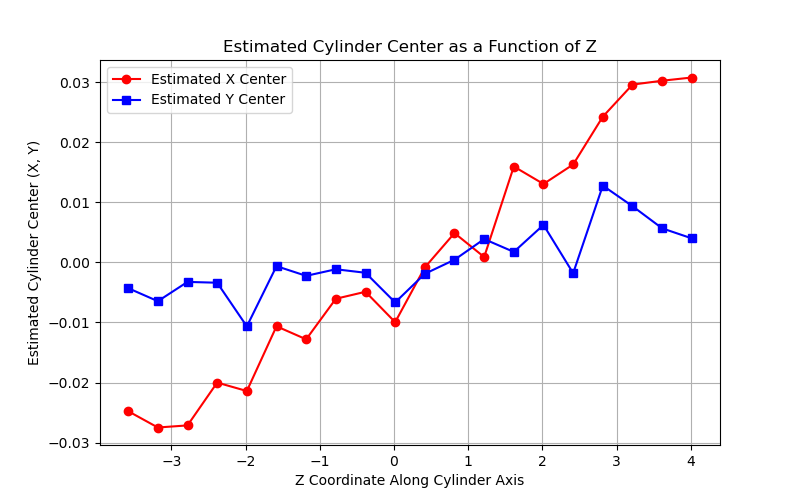

In [56]:

# Example usage:
bin_centers, binned_x_centers, binned_y_centers = fun.compute_and_plot_binned_cylinder_center(pcd_cyl_e, cylinder_axis_pcd_e, cylinder_center_pcd_e)


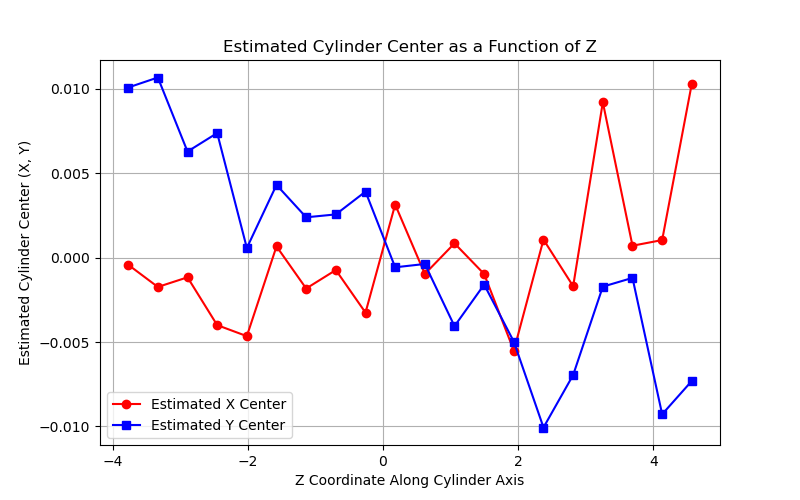

In [57]:
bin_centers, binned_x_centers, binned_y_centers = fun.compute_and_plot_binned_cylinder_center(pcd_cyl, cylinder_axis, cylinder_center)
